In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
from scipy import stats, optimize, interpolate

# Exercise 1

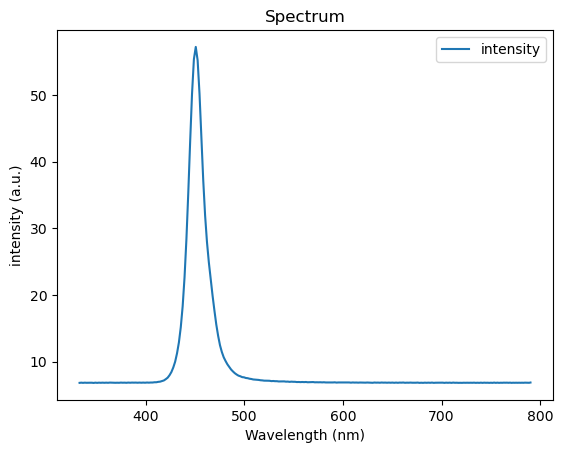

In [15]:

spec = pd.read_csv("spectrum.csv")
spec.columns = ['wavelength', 'intensity'] # nm and a.u.
specplt = spec.plot(x="wavelength", y = "intensity", title="Spectrum", \
                    xlabel="Wavelength (nm)", ylabel='intensity (a.u.)')


# Exercise 2

LinregressResult(slope=0.019150714285714285, intercept=0.02582857142857148, rvalue=0.9963312874729323, pvalue=1.562730028910483e-06, stderr=0.000735646806891571, intercept_stderr=0.016449562676402137)


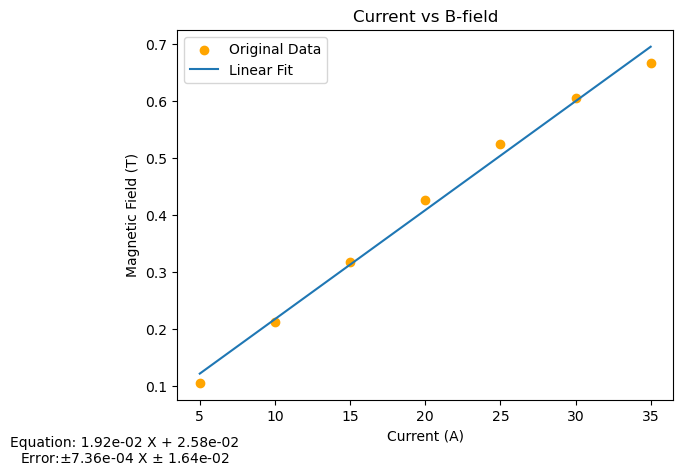

In [16]:
current = np.array([5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0])
bfield = np.array([0.1056, 0.2125, 0.3179, 0.4265, 0.5258, 0.6058, 0.6678])
results = scipy.stats.linregress(current,bfield)

print(results)
x = np.linspace(current.min(), current.max(), 100)
y = results.slope * x + results.intercept
equation = "{:.2e}".format(results.slope) + " X + " + "{:.2e}".format(results.intercept)
err = "$\pm$" + "{:.2e}".format(results.stderr) + " X $\pm$ " + "{:.2e}".format(results.intercept_stderr) 
fig = plt.scatter(current,bfield, label = "Original Data" , color = "orange")
fit = plt.plot(x, y, label = "Linear Fit" )

plt.text(0,0, "\nEquation: " + equation + "\nError:" + err, horizontalalignment='center',
     verticalalignment='center')


plt.title("Current vs B-field")
plt.xlabel("Current (A)")
plt.ylabel("Magnetic Field (T)")
plt.legend()



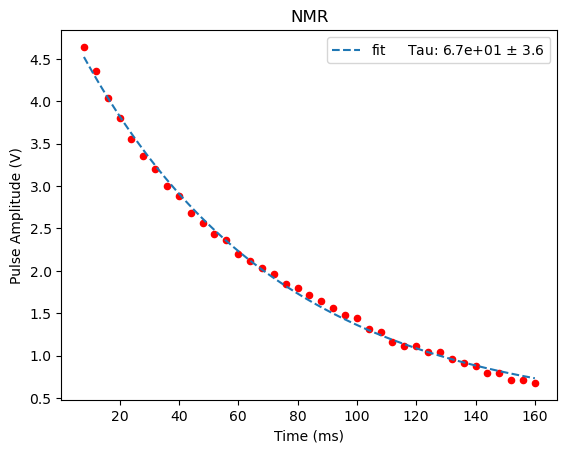

In [19]:
nmr = pd.read_csv("NMR.csv")
nmr.columns = ['time','amplitude'] # ms and V
nmr.plot.scatter(x="time", y = "amplitude", title="NMR", \
         xlabel="Time (ms)", ylabel='Pulse Amplitude (V)',color='r')


def expFunc(x, A, tau, c):
     return A * np.exp(-x/tau) + c 

 

fit_params, pcov = scipy.optimize.curve_fit(expFunc, nmr["time"], nmr["amplitude"], p0 = [4.7, 65, 0.6])
error_df = pd.DataFrame(pcov, columns=["amp", "time", "shift"])

x = np.linspace(nmr["time"].min(), nmr["time"].max(), 100)
y = expFunc(x, fit_params[0], fit_params[1], fit_params[2])

tau = fit_params[1]
tauerr = error_df["time"][1]

strParam = "\tTau: " +  "{:2.2}".format(tau) + " $\pm$ " + "{:.2}".format(tauerr)
plt.plot(x,y, "--",label = "fit" + strParam)

plt.legend()


In [ ]:
def HelmholtzCoil(current, n_turns = 320, coil_radius = 0.068):
    bohrMag = 4  * np.pi * pow(10, -7)
    return 8 * bohrMag * n_turns * current / (coil_radius * np.sqrt(125))

i_DC = np.array([0.16, 0.21, 0.25, 0.29, 0.33, 0.37, 0.42, 0.46, 0.50, 0.54, 0.58, 0.63, 0.67, 0.71])

mag_field = HelmholtzCoil(i_DC)
data_dict = {"current": i_DC, "mag_field": mag_field}
df = pd.DataFrame(data_dict)
print(df)
df.to_csv("exercise4.csv",index=False)



    current  mag_field
0      0.16   0.000677
1      0.21   0.000889
2      0.25   0.001058
3      0.29   0.001227
4      0.33   0.001396
5      0.37   0.001566
6      0.42   0.001777
7      0.46   0.001946
8      0.50   0.002116
9      0.54   0.002285
10     0.58   0.002454
11     0.63   0.002666
12     0.67   0.002835
13     0.71   0.003004


In [ ]:
def isPrime(val):
    
    if val == 1 or val == 2:
        return True
    elif val % 2 == 0 :
        return False
    else:
        i = 3
        while i < val:
            if val%i == 0:
                return False
            else:
                i += 2

    return True

def primesTo(val):

    primes = np.array([2])

    for i in range(3, val + 1, 2):
        if isPrime(i):
            primes = np.append(primes, int(i))

    return primes


data = primesTo(1000)
np.savetxt("primes.csv", data, delimiter = ",", fmt='%d')